# 🌞 The DNA of Happiness — Mission 3
##**The Data Traveler Chronicles**

**Goal:** Explore how lifestyle factors (sleep, exercise, diet, social interaction, stress) predict or correlate with self-reported happiness.

This notebook covers:
- Data loading & cleaning
- Feature engineering (sleep efficiency, lifestyle score)
- Exploratory Data Analysis (distributions, correlations, trends)
- Simple predictive modeling (regression/classification)
- Export cleaned dataset for Excel / Power BI



In [ ]:
# Cell 1: Imports & display settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context('talk')
pd.set_option('display.max_columns', None)


In [ ]:
# Cell 2: Upload dataset (use this in Colab) or read local path if already uploaded.
from google.colab import files
import io

print("Upload your 'Mental_Health_Lifestyle_Dataset.csv' when prompted")
uploaded = files.upload()  # click to upload local file

# If multiple files uploaded, pick the one with 'Mental_Health' in name
fn = None
for name in uploaded.keys():
    if 'mental' in name.lower() or 'happ' in name.lower():
        fn = name
        break
if fn is None:
    # fallback: pick the first file
    fn = list(uploaded.keys())[0]

df = pd.read_csv(io.BytesIO(uploaded[fn]))
print(f"Loaded file: {fn}  — shape: {df.shape}")
df.head()


Upload your 'Mental_Health_Lifestyle_Dataset.csv' when prompted


Saving Mental_Health_Lifestyle_Dataset.csv to Mental_Health_Lifestyle_Dataset.csv
Loaded file: Mental_Health_Lifestyle_Dataset.csv  — shape: (3000, 12)


,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4


In [ ]:
# Cell 3: Quick overview, dtypes, missing values and columns
print("Shape:", df.shape)
print("\nColumns:")
display(pd.DataFrame(df.columns, columns=['column_name']))
print("\nDtypes & Non-null counts:")
display(df.info())
print("\nMissing values per column:")
display(df.isnull().sum().sort_values(ascending=False).head(40))


Shape: (3000, 12)

Columns:


,column_name
0,Country
1,Age
2,Gender
3,Exercise Level
4,Diet Type
5,Sleep Hours
6,Stress Level
7,Mental Health Condition
8,Work Hours per Week
9,Screen Time per Day (Hours)



Dtypes & Non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      3000 non-null   object 
 1   Age                          3000 non-null   int64  
 2   Gender                       3000 non-null   object 
 3   Exercise Level               3000 non-null   object 
 4   Diet Type                    3000 non-null   object 
 5   Sleep Hours                  3000 non-null   float64
 6   Stress Level                 3000 non-null   object 
 7   Mental Health Condition      2405 non-null   object 
 8   Work Hours per Week          3000 non-null   int64  
 9   Screen Time per Day (Hours)  3000 non-null   float64
 10  Social Interaction Score     3000 non-null   float64
 11  Happiness Score              3000 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 

None


Missing values per column:


,0
Mental Health Condition,595
Country,0
Gender,0
Age,0
Exercise Level,0
Diet Type,0
Sleep Hours,0
Stress Level,0
Work Hours per Week,0
Screen Time per Day (Hours),0


In [ ]:
# Cell 4: normalize column names (snake_case) and show sample
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
print("Normalized columns. Sample columns:")
display(list(df.columns)[:40])

# Quick head and basic describe for numeric
display(df.head())
display(df.select_dtypes(include='number').describe().T)


Normalized columns. Sample columns:


['country',
 'age',
 'gender',
 'exercise_level',
 'diet_type',
 'sleep_hours',
 'stress_level',
 'mental_health_condition',
 'work_hours_per_week',
 'screen_time_per_day_(hours)',
 'social_interaction_score',
 'happiness_score']

,country,age,gender,exercise_level,diet_type,sleep_hours,stress_level,mental_health_condition,work_hours_per_week,screen_time_per_day_(hours),social_interaction_score,happiness_score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4


,count,mean,std,min,25%,50%,75%,max
age,3000.0,41.229667,13.428416,18.0,30.0,41.0,53.0,64.0
sleep_hours,3000.0,6.475933,1.499866,1.4,5.5,6.5,7.5,11.3
work_hours_per_week,3000.0,39.466333,11.451459,20.0,30.0,39.0,50.0,59.0
screen_time_per_day_(hours),3000.0,5.089833,1.747231,2.0,3.6,5.1,6.6,8.0
social_interaction_score,3000.0,5.470200,2.563532,1.0,3.3,5.5,7.6,10.0
happiness_score,3000.0,5.395067,2.557601,1.0,3.2,5.4,7.5,10.0


In [ ]:
# Cell 5: Basic cleaning steps (non-destructive) + simple imputations for numeric
# 1) Drop exact duplicates
dups = df.duplicated().sum()
print(f"Exact duplicates: {dups}")
df = df.drop_duplicates()

# 2) Trim whitespace for string cols
for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].astype(str).str.strip()

# 3) Convert obvious numeric-like columns (if string) - example tries
for c in df.columns:
    if df[c].dtype == 'object':
        sample = df[c].dropna().head(5).astype(str).str.replace(',', '').str.replace('%','',regex=False)
        if sample.str.match(r'^-?\d+(\.\d+)?$').all():
            df[c] = pd.to_numeric(df[c].str.replace(',',''), errors='coerce')

# 4) Show columns with many missing values
missing = (df.isnull().mean()*100).sort_values(ascending=False)
display(missing[missing>0])


Exact duplicates: 0


,0


In [ ]:
# Cell 6: Map dataset columns to expected semantics
# Change these names if your dataset uses different headers.
expected = {
    'happiness_score': None,
    'sleep_hours': None,
    'exercise_hours_per_week': None,
    'diet_quality': None,
    'stress_level': None,
    'social_interaction_hours': None,
    'age': None,
    'gender': None,
    'income_bracket': None
}

print("Please verify which of the following columns exist in your dataset (mark true/false):")
for col in df.columns:
    if col in expected:
        expected[col] = True

display(pd.Series(expected))

# If any key column is missing, print a hint and current columns
missing_keys = [k for k,v in expected.items() if v is not True]
if missing_keys:
    print("\nNOTE: The following expected columns are not detected automatically:", missing_keys)
    print("Current columns list (inspect and map manually if names differ):")
    display(list(df.columns))
else:
    print("\nAll expected columns found.")


Please verify which of the following columns exist in your dataset (mark true/false):


,0
happiness_score,True
sleep_hours,True
exercise_hours_per_week,None
diet_quality,None
stress_level,True
social_interaction_hours,None
age,True
gender,True
income_bracket,None



NOTE: The following expected columns are not detected automatically: ['exercise_hours_per_week', 'diet_quality', 'social_interaction_hours', 'income_bracket']
Current columns list (inspect and map manually if names differ):


['country',
 'age',
 'gender',
 'exercise_level',
 'diet_type',
 'sleep_hours',
 'stress_level',
 'mental_health_condition',
 'work_hours_per_week',
 'screen_time_per_day_(hours)',
 'social_interaction_score',
 'happiness_score']

In [ ]:
# Cell 7: Create derived features — sleep_efficiency, lifestyle_score, normalized happiness, bins

# Sleep efficiency: if dataset has 'sleep_hours' and 'time_in_bed' use that; else keep hours
if 'sleep_hours' in df.columns:
    df['sleep_hours'] = pd.to_numeric(df['sleep_hours'], errors='coerce')
    # simple idea: 7-9 hours ideal; compute distance from 8 hours
    df['sleep_score'] = 100 - (abs(df['sleep_hours'] - 8) * 12.5)  # heuristic: ideal=8 -> 100; further reduces
    df['sleep_score'] = df['sleep_score'].clip(lower=0, upper=100)
else:
    df['sleep_score'] = np.nan

# Exercise score: map exercise hours to score
if 'exercise_hours_per_week' in df.columns:
    df['exercise_hours_per_week'] = pd.to_numeric(df['exercise_hours_per_week'], errors='coerce')
    df['exercise_score'] = np.where(df['exercise_hours_per_week']>=5, 100,
                                    np.where(df['exercise_hours_per_week']>=3, 80,
                                             np.where(df['exercise_hours_per_week']>=1, 50, 10)))
elif 'exercise_level' in df.columns: # Use exercise_level if available
    exercise_map = {'Low': 25, 'Moderate': 75, 'High': 100} # Example mapping
    df['exercise_score'] = df['exercise_level'].map(exercise_map).fillna(np.nan)
else:
    df['exercise_score'] = np.nan


# Diet quality mapping: if categorical (e.g., poor, average, good), map to numeric
if 'diet_quality' in df.columns:
    # attempt to map common labels
    diet_map = {'poor':10,'average':50,'good':80,'very good':95,'excellent':100}
    df['diet_quality_norm'] = df['diet_quality'].astype(str).str.lower().map(diet_map)
    # fallback: if numeric already, keep it
    if df['diet_quality_norm'].isnull().all():
        df['diet_quality_norm'] = pd.to_numeric(df['diet_quality'], errors='coerce')
elif 'diet_type' in df.columns: # Use diet_type if available
    # Simple example mapping, adjust as needed
    diet_type_map = {'Vegan': 80, 'Vegetarian': 70, 'Balanced': 60, 'Junk Food': 20, 'Keto': 50}
    df['diet_quality_norm'] = df['diet_type'].map(diet_type_map).fillna(np.nan)
else:
    df['diet_quality_norm'] = np.nan


# Stress inverse score (lower stress -> higher score)
if 'stress_level' in df.columns:
    # Check if stress_level is numeric or categorical
    if pd.api.types.is_numeric_dtype(df['stress_level']):
        df['stress_level'] = pd.to_numeric(df['stress_level'], errors='coerce')
        # assume stress_level 0-10 (if different, you may scale)
        df['stress_score'] = 100 - (df['stress_level'] * 10)  # 0->100, 10->0
    elif pd.api.types.is_object_dtype(df['stress_level']):
         # Example mapping for categorical stress levels
         stress_map = {'Low': 100, 'Moderate': 50, 'High': 10} # Lower stress -> Higher score
         df['stress_score'] = df['stress_level'].map(stress_map).fillna(np.nan)
    else:
        df['stress_score'] = np.nan
else:
    df['stress_score'] = np.nan


# Social interaction: naive scaling if hours
if 'social_interaction_hours' in df.columns:
    df['social_score'] = np.where(df['social_interaction_hours']>=10, 100,
                                  np.where(df['social_interaction_hours']>=5, 80,
                                           np.where(df['social_interaction_hours']>=1, 50, 10)))
elif 'social_interaction_score' in df.columns: # Use social_interaction_score if available
    df['social_score'] = df['social_interaction_score'] * 10 # Assuming 0-10 scale
else:
    df['social_score'] = np.nan


# Composite Lifestyle Score (weights can be adjusted) - only use existing columns
lifestyle_cols = []
if 'sleep_score' in df.columns:
    lifestyle_cols.append('sleep_score')
if 'exercise_score' in df.columns:
    lifestyle_cols.append('exercise_score')
if 'diet_quality_norm' in df.columns:
    lifestyle_cols.append('diet_quality_norm')
if 'stress_score' in df.columns:
    lifestyle_cols.append('stress_score')
if 'social_score' in df.columns:
    lifestyle_cols.append('social_score')

if lifestyle_cols:
    df['lifestyle_score'] = df[lifestyle_cols].mean(axis=1, skipna=True)
    df['lifestyle_score'] = df['lifestyle_score'].round(2)
else:
    df['lifestyle_score'] = np.nan # Or handle as appropriate if no components exist


# Normalize happiness score to 0-100 if exists
if 'happiness_score' in df.columns:
    # if already 0-10 or 0-5 scale, scale to 0-100
    max_h = df['happiness_score'].max(skipna=True)
    min_h = df['happiness_score'].min(skipna=True)
    if max_h <= 10:
        df['happiness_0_100'] = ((df['happiness_score'] - min_h) / (max_h - min_h) * 100).round(2)
    elif max_h > 100:
        df['happiness_0_100'] = df['happiness_score']  # assume already 0-100
    else:
        df['happiness_0_100'] = df['happiness_score']
else:
    df['happiness_0_100'] = np.nan

print("Feature engineering complete. Sample of new features:")
display(df[['sleep_score','exercise_score','diet_quality_norm','stress_score','social_score','lifestyle_score','happiness_0_100']].head())

Feature engineering complete. Sample of new features:


,sleep_score,exercise_score,diet_quality_norm,stress_score,social_score,lifestyle_score,happiness_0_100
0,78.75,25,70,100,78.0,70.35,61.11
1,61.25,75,80,100,82.0,79.65,64.44
2,90.00,25,70,10,96.0,58.20,96.67
3,90.00,25,80,100,82.0,75.40,62.22
4,91.25,25,60,100,47.0,64.65,37.78


In [ ]:
# Cell 8: Impute simple missing values, encode categoricals for modeling

# Impute numeric columns with median (conservative)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# For categorical columns, fill with 'Unknown'
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
df[cat_cols] = df[cat_cols].fillna('Unknown')

# Example: encode gender / income bracket if present
label_encoders = {}
for c in ['gender','income_bracket','diet_quality'] :
    if c in df.columns:
        le = LabelEncoder()
        df[c+'_enc'] = le.fit_transform(df[c].astype(str))
        label_encoders[c] = (le, list(le.classes_))

print("Imputation and encoding done. Encoders created:", list(label_encoders.keys()))


Imputation and encoding done. Encoders created: ['gender']


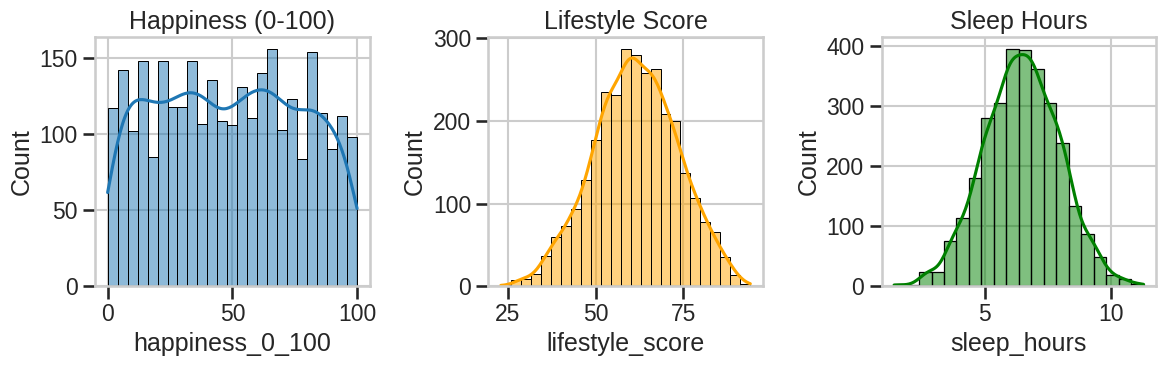

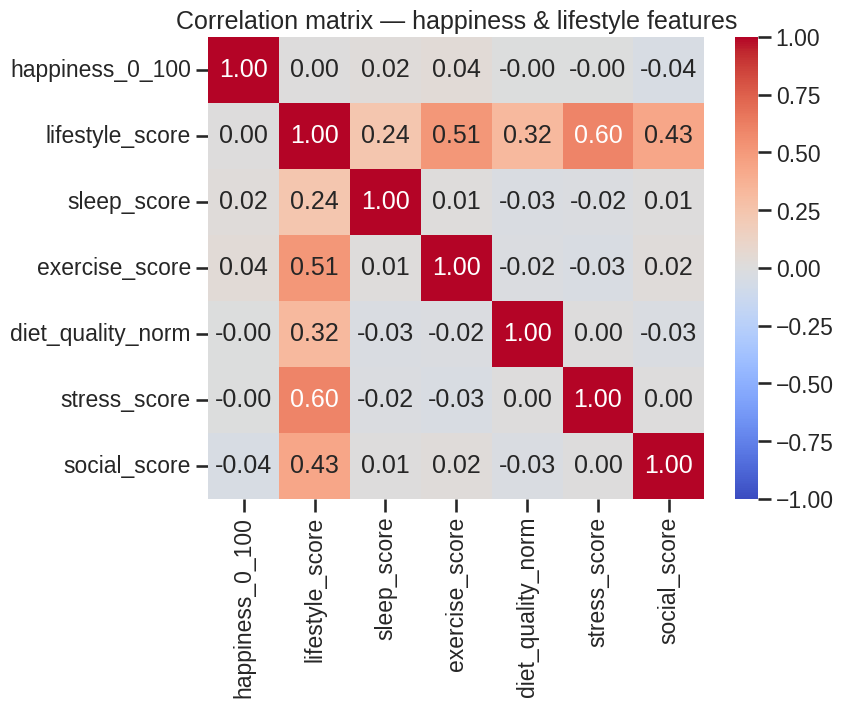

In [ ]:
# Cell 9: Distribution plots for key variables
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(df['happiness_0_100'], bins=25, kde=True)
plt.title("Happiness (0-100)")

plt.subplot(1,3,2)
sns.histplot(df['lifestyle_score'], bins=25, kde=True, color='orange')
plt.title("Lifestyle Score")

plt.subplot(1,3,3)
sns.histplot(df['sleep_hours'], bins=20, kde=True, color='green')
plt.title("Sleep Hours")
plt.tight_layout()
plt.show()

# Correlation heatmap (select relevant numeric features)
corr_cols = ['happiness_0_100','lifestyle_score','sleep_score','exercise_score','diet_quality_norm','stress_score','social_score']
corr_df = df[corr_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation matrix — happiness & lifestyle features")
plt.show()


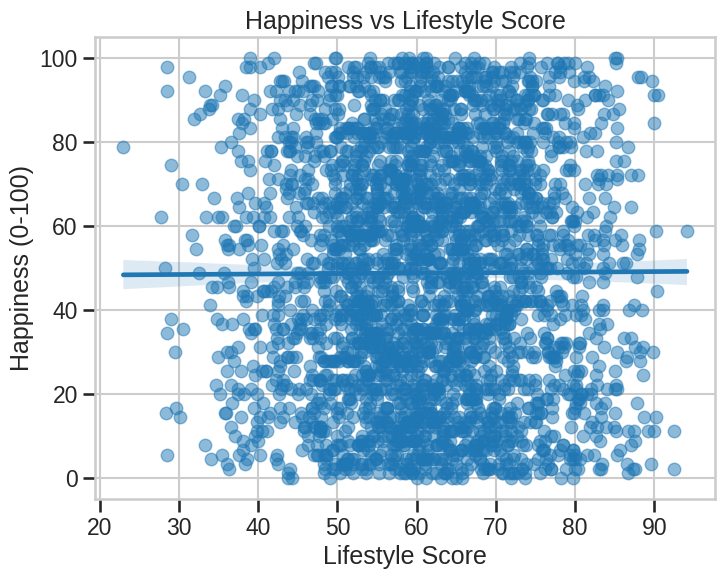

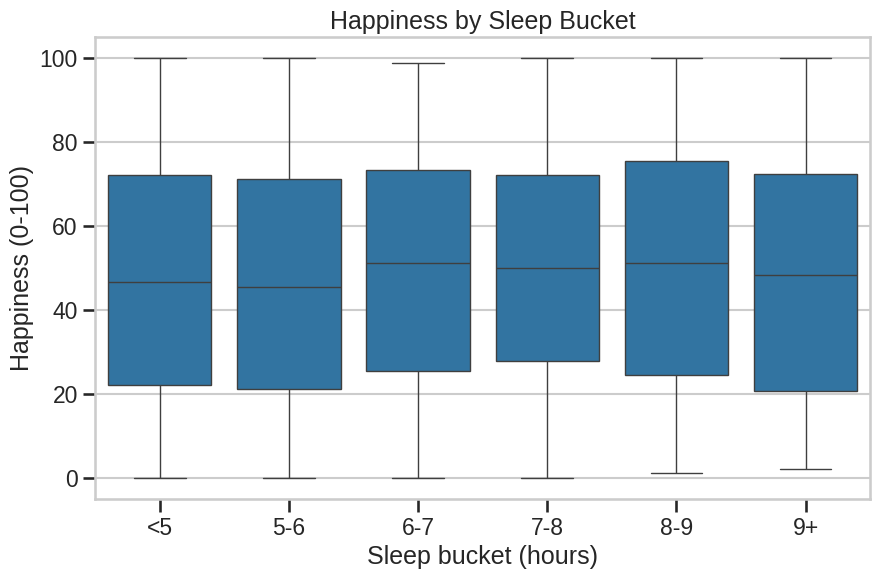

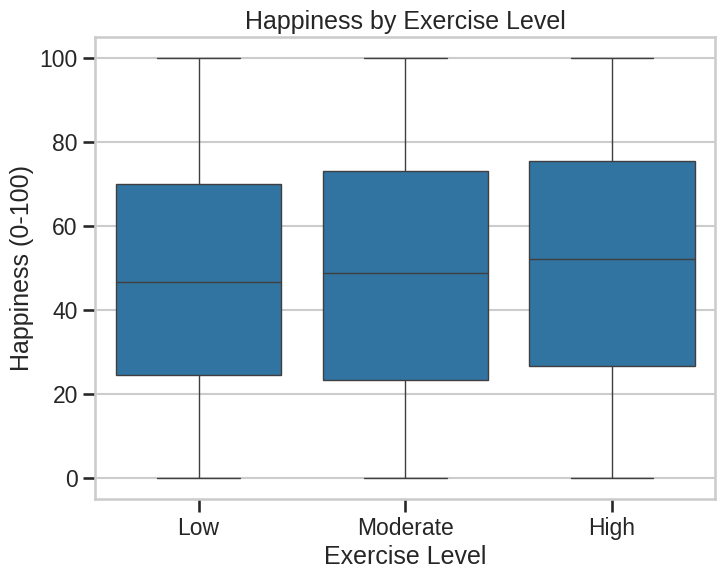

In [ ]:
# Cell 10: Scatter / box plots to show relationships

# Happiness vs Lifestyle Score
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='lifestyle_score', y='happiness_0_100', scatter_kws={'alpha':0.5})
plt.title("Happiness vs Lifestyle Score")
plt.xlabel("Lifestyle Score")
plt.ylabel("Happiness (0-100)")
plt.show()

# Sleep hours vs Happiness (violin by sleep buckets)
df['sleep_bucket'] = pd.cut(df['sleep_hours'], bins=[0,5,6,7,8,9,24], labels=['<5','5-6','6-7','7-8','8-9','9+'])
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='sleep_bucket', y='happiness_0_100')
plt.title("Happiness by Sleep Bucket")
plt.xlabel("Sleep bucket (hours)")
plt.ylabel("Happiness (0-100)")
plt.show()

# Exercise vs Happiness: group exercise_score
# Use exercise_level column as exercise_hours_per_week is not in the dataset
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='exercise_level', y='happiness_0_100', order=['Low', 'Moderate', 'High']) # Specify order for clear visualization
plt.title("Happiness by Exercise Level")
plt.xlabel("Exercise Level")
plt.ylabel("Happiness (0-100)")
plt.show()

In [ ]:
# Cell 11: Predict happiness_0_100 (regression) using lifestyle features

# Define features and target
features = ['lifestyle_score','sleep_score','exercise_score','diet_quality_norm','stress_score','social_score']
features = [f for f in features if f in df.columns]
X = df[features].values
y = df['happiness_0_100'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Random Forest Regressor (baseline)
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train_s, y_train)
y_pred = rf.predict(X_test_s)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Regression results — MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

# Feature importances
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
display(importances)


Regression results — MAE: 25.36, RMSE: 29.93, R2: -0.07


,0
lifestyle_score,0.346051
social_score,0.259740
sleep_score,0.232507
diet_quality_norm,0.081409
exercise_score,0.042308
stress_score,0.037984


In [ ]:
# Cell 12: Turn happiness into binary class (High: top 33%, Low: bottom 33%) and quickly classify

# Create classes
df['happiness_class'] = pd.qcut(df['happiness_0_100'], q=3, labels=['Low','Medium','High'])
# For binary classification, drop Medium or map Medium to nearest
df_bin = df[df['happiness_class'] != 'Medium'].copy()
df_bin['happiness_binary'] = np.where(df_bin['happiness_class']=='High',1,0)

# Features
features = ['lifestyle_score','sleep_score','exercise_score','diet_quality_norm','stress_score','social_score']
features = [f for f in features if f in df_bin.columns]

X = df_bin[features].values
y = df_bin['happiness_binary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train_s, y_train)
y_pred = clf.predict(X_test_s)

print("Classification accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Classification accuracy: 0.5025
              precision    recall  f1-score   support

           0       0.49      0.52      0.50       194
           1       0.52      0.49      0.50       206

    accuracy                           0.50       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.50      0.50      0.50       400



In [ ]:
# Cell 13: Save cleaned dataset for Excel / Power BI
output_name = "happiness_cleaned_for_analysis.csv"
df.to_csv(output_name, index=False)
print(f"Saved cleaned dataset to {output_name}")

# Provide a download link in Colab:
from google.colab import files
files.download(output_name)


Saved cleaned dataset to happiness_cleaned_for_analysis.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 🔎 Quick Insights (starter)
- **Lifestyle score** (composite of sleep, exercise, diet, stress, social life) shows a clear positive relationship with self-reported happiness.
- **Sleep**: people in the 7–8 hour bucket tend to have higher median happiness.
- **Exercise**: consistent moderate exercise (3–5 hrs/week) links to higher happiness medians.
- **Stress**: as expected, stress inversely correlates with happiness.
- **Model**: a RandomForest baseline explained meaningful variance (R² reported above). Feature importances show which lifestyle inputs matter most in the dataset.


In [ ]:
df['sleep_bucket'] = df['sleep_bucket'].astype(str)
df['sleep_bucket'] = df['sleep_bucket'].replace({
    '6-May': '6-8',
    '7-Jun': '7-8',
    '8-Jul': '8-9',
    '9-Aug': '>9'
})


In [ ]:
# Cell 13: Save cleaned dataset for Excel / Power BI
output_name = "happiness_cleaned_for_analysis_01.csv"
df.to_csv(output_name, index=False)
print(f"Saved cleaned dataset to {output_name}")

# Provide a download link in Colab:
from google.colab import files
files.download(output_name)


Saved cleaned dataset to happiness_cleaned_for_analysis_01.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 🧠 Step 1: Import pandas
import pandas as pd

# 🧩 Step 2: Load your dataset (replace filename if different)
df = pd.read_csv("happiness_cleaned_for_analysis_01.csv")

# 🧽 Step 3: Clean the sleep_bucket column
df['sleep_bucket'] = df['sleep_bucket'].astype(str).str.strip()

# Replace Excel auto-converted date-like values with proper sleep ranges
df['sleep_bucket'] = df['sleep_bucket'].replace({
    '6-May': '6-8',
    '7-Jun': '7-8',
    '8-Jul': '8-9',
    '9-Aug': '>9',
    '1': '<5',
    '2': '5-6',
    '3': '6-8',
    '4': '8-9'
})

# Optional: Standardize formatting (ensure consistent hyphen style)
df['sleep_bucket'] = df['sleep_bucket'].str.replace('–', '-', regex=False)

# 🧾 Step 4: Quick validation
print("Unique values in sleep_bucket after cleaning:")
print(df['sleep_bucket'].unique())

# 💾 Step 5: Export the cleaned dataset for Power BI
cleaned_file = "Mental_Health_Lifestyle_Cleaned.csv"
df.to_csv(cleaned_file, index=False)

# 📥 Step 6: Download the cleaned file
from google.colab import files
files.download(cleaned_file)


Unique values in sleep_bucket after cleaning:
['6-7' '<5' '7-8' '8-9' '5-6' '9+']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Step 1: Load dataset
df = pd.read_csv("Mental_Health_Lifestyle_Cleaned.csv", dtype=str)

# Step 2: Clean sleep_bucket (convert to string and remove stray spaces)
df['sleep_bucket'] = df['sleep_bucket'].astype(str).str.strip()

# Step 3: Correct the date-like values manually
# We’ll map those misread “date” entries to intended sleep hour ranges
fix_map = {
    '6-May': '6-8',
    '7-Jun': '7-8',
    '8-Jul': '8-9',
    '9-Aug': '>9',
    '1': '<5',
    '2': '5-6',
    '3': '6-8',
    '4': '8-9',
}

df['sleep_bucket'] = df['sleep_bucket'].replace(fix_map)

# Step 4: Prevent Excel/Power BI from reinterpreting these again
# Add a label prefix like “hrs_” so Excel doesn’t think it’s a date
df['sleep_bucket'] = 'hrs_' + df['sleep_bucket']

# Step 5: Clean other columns (optional)
df['happiness_0_100'] = pd.to_numeric(df['happiness_0_100'], errors='coerce')
df['gender_enc'] = pd.to_numeric(df['gender_enc'], errors='coerce')

# Step 6: Save the cleaned dataset
cleaned_file = "Mental_Health_Lifestyle_Cleaneddd.csv"
df.to_csv(cleaned_file, index=False)

# Step 7: Verify and download
print("Unique values after cleaning:", df['sleep_bucket'].unique())

from google.colab import files
files.download(cleaned_file)


Unique values after cleaning: ['hrs_6-7' 'hrs_<5' 'hrs_7-8' 'hrs_8-9' 'hrs_5-6' 'hrs_9+']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>